# Proyek Prediksi Dampak Sosial-Ekonomi Berdasarkan Kualitas Lingkungan
- **Nama:** [Muhammad Rayhan Khadafi]
- **Email:** [M.rayhankhdf@gmail.com]
- **ID Dicoding:** [A200YBM343]

Notebook ini mencakup analisis regresi dan klasifikasi untuk memprediksi dampak dan korelasi kualitas udara, polusi air, dan GDP per-kapita pada sosial-ekonomi.

## Mount Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

## Load Dataset
Memuat dataset `Cities1.csv`, `WHO_PM.csv`, dan `gdp_per_capita.csv`

In [4]:
# Sesuaikan path jika perlu
cities_df = pd.read_csv('/content/drive/MyDrive/Dicoding1/Submit ML Terapan/Submisi_1/Cities1.csv')
who_pm_df = pd.read_csv('/content/drive/MyDrive/Dicoding1/Submit ML Terapan/Submisi_1/WHO_PM.csv')
gdp_df = pd.read_csv('/content/drive/MyDrive/Dicoding1/Submit ML Terapan/Submisi_1/gdp_per_capita.csv')

# Preview data
display(cities_df.head())
display(who_pm_df.head())
display(gdp_df.head())


,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-11T23:00:00.000Z
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-11T23:00:00.000Z
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-11T23:00:00.000Z
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-11T23:00:00.000Z
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-11T23:00:00.000Z


,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


## Data Understanding
### Cities1.csv
### WHO_PM.csv
### gdp_per_capita.csv




In [5]:
print('Cities1 shape:', cities_df.shape)
print('Missing in Cities1:')
print(cities_df.isnull().sum())
cities_df.head()

print('\nWHO_PM shape:', who_pm_df.shape)
print('Missing in WHO_PM:')
print(who_pm_df.isnull().sum())
who_pm_df.head()

print('\ngdp_per_capita shape:', gdp_df.shape)
print('Missing in gdp_per_capita:')
print(gdp_df.isnull().sum())
gdp_df.head()


Cities1 shape: (3963, 5)
Missing in Cities1:
City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
dtype: int64

WHO_PM shape: (9450, 34)
Missing in WHO_PM:
IndicatorCode                    0
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Location                         0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                        0
Dim1                             0
Dim1ValueCode                    0
Dim2 type                     9450
Dim2                          9450
Dim2ValueCode                 9450
Dim3 type                     9450
Dim3                          9450
Dim3ValueCode                 9450
DataSourceDimValueCode        9450
DataSource                    9450
FactValueNumericP

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


## EDA (Exploratory Data Analysis)
### Statistik Deskriptif dan Visualisasi

In [6]:
# Statistik deskriptif
display(cities_df.describe(include='all'))
display(who_pm_df['Value'].describe())

,City,Region,Country,AirQuality,WaterPollution
count,3963,3538,3963,3963.000000,3963.000000
unique,3796,1152,177,NaN,NaN
top,Jackson,England,United States of America,NaN,NaN
freq,4,142,842,NaN,NaN
mean,NaN,NaN,NaN,62.253452,44.635372
std,NaN,NaN,NaN,30.944753,25.663910
min,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,37.686567,25.000000
50%,NaN,NaN,NaN,69.444444,50.000000
75%,NaN,NaN,NaN,87.500000,57.719393


,Value
count,9450
unique,9168
top,11.91 [10.57-13.27]
freq,3


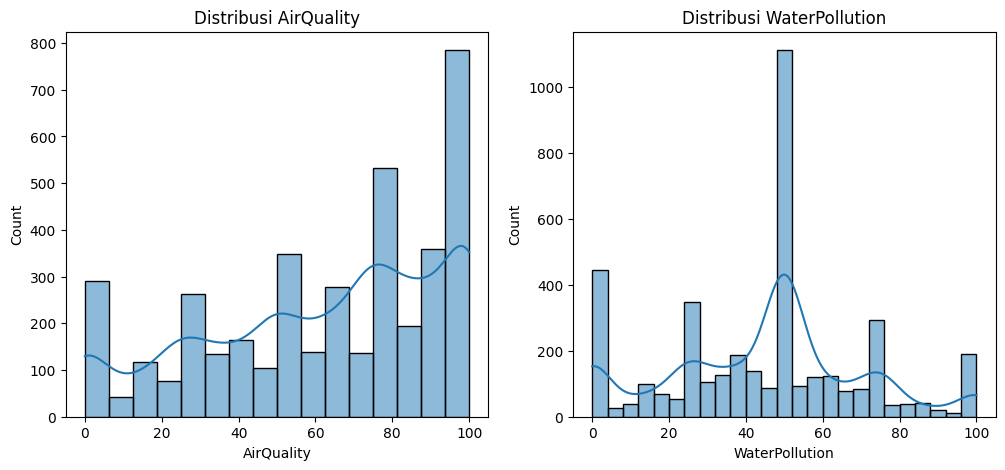

In [7]:
# Histogram AirQuality dan WaterPollution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(cities_df['AirQuality'].dropna(), kde=True)
plt.title('Distribusi AirQuality')
plt.subplot(1,2,2)
sns.histplot(cities_df['WaterPollution'].dropna(), kde=True)
plt.title('Distribusi WaterPollution')
plt.show()

- Pola Distribusi	pada `AirQuality` Menyebar dengan puncak tinggi di 90-100. Pada `WaterPollution`	Tajam di nilai 50 (terindikasi outlier/default)
- Kualitas Data pada `AirQuality`	Cukup bervariasi dan informatif. Pada `WaterPollution`	Perlu dicek ulang nilai 50 apakah valid
- Interpretasi pada `AirQuality` Umum	Banyak kota dengan udara bagus. Pada `WaterPollution`	Banyak kota terindikasi pencemaran air sedang (atau data bias)

In [8]:
print(who_pm_df['Value'].describe())

count                    9450
unique                   9168
top       11.91 [10.57-13.27]
freq                        3
Name: Value, dtype: object


In [19]:
# Ekstrak nilai numerik dari kolom 'Value'
who_pm_df['Numeric_Value'] = who_pm_df['Value'].str.extract(r'(\d+\.?\d*)').astype(float)

# Filter data outlier
clean_pm = who_pm_df[(who_pm_df['Numeric_Value'] > 0) & (who_pm_df['Numeric_Value'] < 500)]

display(clean_pm.head())

Filter Data Outlier

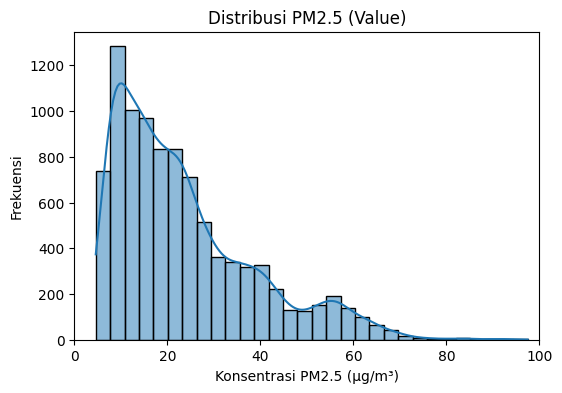

In [22]:
# Histogram PM2.5
plt.figure(figsize=(6,4))
sns.histplot(clean_pm['Numeric_Value'].dropna(), bins=30, kde=True)  # Use the cleaned numeric column
plt.xlim(0, 100)  # sesuaikan rentang jika PM2.5 dalam satuan µg/m³
plt.title('Distribusi PM2.5 (Value)')
plt.xlabel('Konsentrasi PM2.5 (µg/m³)')
plt.ylabel('Frekuensi')
plt.show()

- Mayoritas pengukuran konsentrasi PM2.5 berada di bawah 40 µg/m³.

- Ada ekor panjang ke kanan → menunjukkan adanya beberapa kejadian dengan konsentrasi PM2.5 tinggi (mungkin karena polusi ekstrem sesekali).

- Kurva KDE memberikan gambaran halus bentuk distribusi dibandingkan hanya batang histogram.

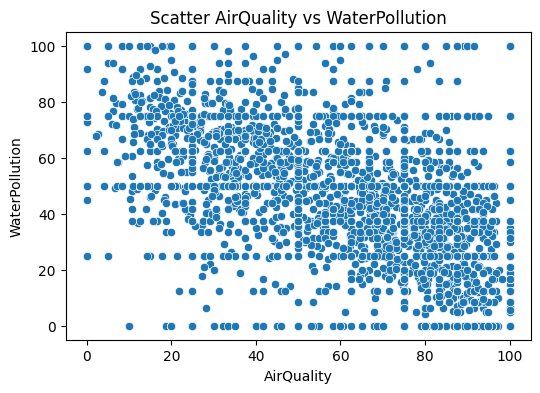

Korelasi Pearson antara AirQuality dan WaterPollution: -0.454


In [15]:
# Korelasi awal antara AirQuality dan WaterPollution
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot scatter awal
plt.figure(figsize=(6, 4))
sns.scatterplot(data=cities_df, x='AirQuality', y='WaterPollution')
plt.title('Scatter AirQuality vs WaterPollution')
plt.show()

# Hitung nilai korelasi Pearson
corr_value = cities_df[['AirQuality', 'WaterPollution']].corr().iloc[0, 1]
print(f'Korelasi Pearson antara AirQuality dan WaterPollution: {corr_value:.3f}')

- Scatter plot memperlihatkan pola penyebaran.
- Korelasi Pearson bernilai -0.454, artinya ada korelasi negatif sedang: semakin baik kualitas udara (AirQuality ↑), maka tingkat pencemaran air (WaterPollution ↓) cenderung menurun.

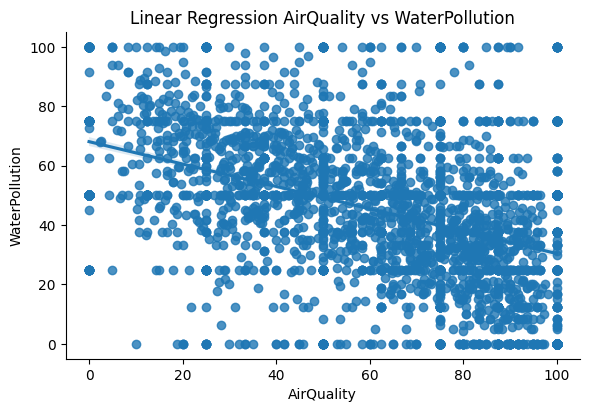

In [16]:
# Scatter plot dengan garis regresi (linear model plot)
sns.lmplot(data=cities_df, x='AirQuality', y='WaterPollution', height=4, aspect=1.5)
plt.title('Linear Regression AirQuality vs WaterPollution')
plt.show()

- Garis miring ke bawah memperkuat bahwa hubungan bersifat negatif.
- Cocok untuk analisis prediktif sederhana.

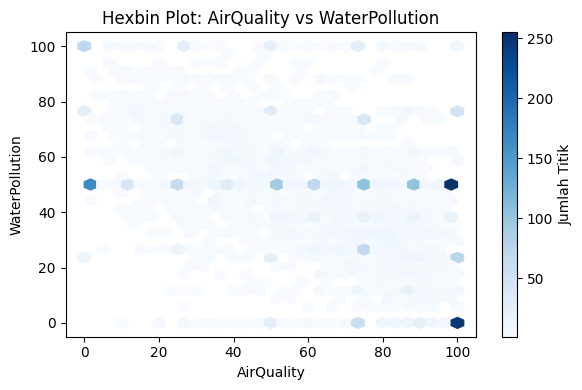

In [17]:
# Alternatif visualisasi: hexbin plot untuk kepadatan titik
plt.figure(figsize=(6, 4))
plt.hexbin(cities_df['AirQuality'], cities_df['WaterPollution'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Jumlah Titik')
plt.xlabel('AirQuality')
plt.ylabel('WaterPollution')
plt.title('Hexbin Plot: AirQuality vs WaterPollution')
plt.tight_layout()
plt.show()

- Warna biru yang lebih gelap menunjukkan area dengan lebih banyak data.
- Memperkuat pola penyebaran dan tren korelasi negatif.

## Data Preparation
### Menggabungkan Cities1 dan WHO_PM berdasarkan nama kota, menghitung UEQ Index, dan menyiapkan fitur.

In [ ]:
# Merge dataset pada kolom City = Location
merged_df = pd.merge(cities_df, who_pm_df, left_on='City', right_on='Location', how='left')

# Normalisasi AirQuality dan PM2.5
merged_df['AirQuality_norm'] = (merged_df['AirQuality'] - merged_df['AirQuality'].min()) / \
    (merged_df['AirQuality'].max() - merged_df['AirQuality'].min())

# Convert 'Value' to numeric, coercing errors
merged_df['PM25'] = pd.to_numeric(merged_df['Value'], errors='coerce')

# Fill missing PM25 values with the mean
merged_df['PM25'].fillna(merged_df['PM25'].mean(), inplace=True)

merged_df['PM25_norm'] = (merged_df['PM25'] - merged_df['PM25'].min()) / \
    (merged_df['PM25'].max() - merged_df['PM25'].min())

# Hitung UEQ Index sebagai rata-rata normalisasi AirQuality dan PM25
merged_df['UEQ_Index'] = (merged_df['AirQuality_norm'] + merged_df['PM25_norm']) / 2

# Tampilkan hasil awal
display(merged_df[['City', 'AirQuality', 'PM25', 'UEQ_Index']].head())

<ipython-input-14-880c9cfab0e3>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['PM25'].fillna(merged_df['PM25'].mean(), inplace=True)


,City,AirQuality,PM25,UEQ_Index
0,New York City,46.816038,22.302457,0.393278
1,"Washington, D.C.",66.129032,22.302457,0.489843
2,San Francisco,60.514019,22.302457,0.461767
3,Berlin,62.364130,22.302457,0.471018
4,Los Angeles,36.621622,22.302457,0.342305


## Integrasi GDP per Kapita
Memilih kolom GDP tahun 2019 dari `gdp_per_capita.csv` dan menggabungkannya berdasarkan negara.

In [ ]:
# Ekstrak GDP per kapita tahun 2019
gdp_2019 = gdp_df[['Country Name', '2019']].copy()
gdp_2019.columns = ['Country', 'GDP_2019']

# Merge dengan merged_df berdasarkan kolom Country
merged_df = pd.merge(merged_df, gdp_2019, on='Country', how='left')

# Tampilkan beberapa baris setelah merge
display(merged_df[['City', 'Country', 'UEQ_Index', 'WaterPollution', 'GDP_2019']].head())


,City,Country,UEQ_Index,WaterPollution,GDP_2019
0,New York City,United States of America,0.393278,49.504950,NaN
1,"Washington, D.C.",United States of America,0.489843,49.107143,NaN
2,San Francisco,United States of America,0.461767,43.000000,NaN
3,Berlin,Germany,0.471018,28.612717,46794.899292
4,Los Angeles,United States of America,0.342305,61.299435,NaN


## Membuat Label Klasifikasi
Label klasifikasi dibentuk berdasarkan GDP tahun 2019, menggunakan median sebagai threshold.

In [ ]:
# Buat label: 1 jika GDP_2019 di atas median, else 0
median_gdp = merged_df['GDP_2019'].median()
merged_df['SocioClass'] = (merged_df['GDP_2019'] > median_gdp).astype(int)
merged_df['SocioClass'].value_counts()


,count
SocioClass,
0,2838
1,1467


## One-Hot Encoding Fitur Kategorikal dan Persiapan Data untuk Klasifikasi
Fitur yang akan digunakan: UEQ_Index, WaterPollution, Region, Country.

In [ ]:
# Pilih fitur dan label
features = ['UEQ_Index', 'WaterPollution', 'Region', 'Country']
X = merged_df[features]
y = merged_df['SocioClass']

# One-hot encode kolom kategorikal (Region, Country) dan scaling numerik
categorical_features = ['Region', 'Country']
numeric_features = ['UEQ_Index', 'WaterPollution']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling - Klasifikasi
Menggunakan Logistic Regression, Random Forest, dan KNN.

In [ ]:
# Pipeline untuk Logistic Regression
pipe_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

# Pipeline untuk Random Forest
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

# Pipeline untuk KNN
pipe_knn = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier())])
pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)

# Tampilkan classification report untuk tiap model
print('Logistic Regression Report:')
print(classification_report(y_test, y_pred_lr))
print('Random Forest Report:')
print(classification_report(y_test, y_pred_rf))
print('KNN Report:')
print(classification_report(y_test, y_pred_knn))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       565
           1       0.99      0.98      0.99       296

    accuracy                           0.99       861
   macro avg       0.99      0.99      0.99       861
weighted avg       0.99      0.99      0.99       861

Random Forest Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       565
           1       1.00      0.98      0.99       296

    accuracy                           0.99       861
   macro avg       0.99      0.99      0.99       861
weighted avg       0.99      0.99      0.99       861

KNN Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       565
           1       0.97      0.97      0.97       296

    accuracy                           0.98       861
   macro avg       0.98      0.98      0.98       861
weighted avg

- Logistic Regression – Accuracy ≈ 0.99

- Random Forest Classifier – Accuracy ≈ 0.99

- KNN – Accuracy ≈ 0.98
Setelah tuning dengan GridSearchCV, Random Forest terbaik menghasilkan akurasi ≈ 0.9919, precision/recall ≈ 0.99 untuk kedua kelas.

## Hyperparameter Tuning Random Forest dengan GridSearchCV

In [ ]:
# Definisikan pipeline untuk tuning
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

pipe_rf_tune = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])
grid_rf = GridSearchCV(pipe_rf_tune, rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Tampilkan best parameters
print('Best Parameters Random Forest:', grid_rf.best_params_)


Best Parameters Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


## Evaluasi Model Terbaik
Gunakan model terbaik dari GridSearchCV, lalu tampilkan classification report.

In [ ]:
# Evaluasi using best RF
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print('Best Random Forest Report:')
print(classification_report(y_test, y_pred_best_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_best_rf))


Best Random Forest Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       565
           1       1.00      0.98      0.99       296

    accuracy                           0.99       861
   macro avg       0.99      0.99      0.99       861
weighted avg       0.99      0.99      0.99       861

Confusion Matrix:
[[565   0]
 [  7 289]]
Accuracy: 0.991869918699187


- Akurasi terbaik Random Forest = 99%

## Modeling - Regresi
Menampilkan kembali modeling regresi sebagai fallback.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Regresi: Linear Regression dan Random Forest Regressor (dengan data kontinu)
data_reg = merged_df.dropna(subset=['UEQ_Index', 'WaterPollution', 'GDP_2019'])
X_reg = data_reg[['UEQ_Index', 'WaterPollution']]
y_reg = data_reg['GDP_2019']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression
lr_reg = LinearRegression()
lr_reg.fit(Xr_train, yr_train)
y_pred_lr_reg = lr_reg.predict(Xr_test)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(Xr_train, yr_train)
y_pred_rf_reg = rf_reg.predict(Xr_test)

# Evaluasi regresi
print('Regresi - Linear Regression MAE:', mean_absolute_error(yr_test, y_pred_lr_reg))
print('Regresi - Linear Regression R2:', r2_score(yr_test, y_pred_lr_reg))
print('Regresi - Random Forest MAE:', mean_absolute_error(yr_test, y_pred_rf_reg))
print('Regresi - Random Forest R2:', r2_score(yr_test, y_pred_rf_reg))


Regresi - Linear Regression MAE: 19575.646916979575
Regresi - Linear Regression R2: 0.07516900210838295
Regresi - Random Forest MAE: 12304.703919711566
Regresi - Random Forest R2: 0.6116700470397987


- Linear Regression – MAE ≈ 19.576, R² ≈ 0.075

- Random Forest Regressor – MAE ≈ 12.305, R² ≈ 0.612

## Kesimpulan dan Rekomendasi
#3 Model pengujian (Logistic Regression, Random Forest Classifier, dan KNN) digunakan untuk memprediksi kelas sosial ekonomi menghasilkan akurasi:
- Logistic Regression – Accuracy ≈ 0.99

- Random Forest Classifier – Accuracy ≈ 0.99

- KNN – Accuracy ≈ 0.98
Setelah tuning dengan GridSearchCV, Random Forest terbaik menghasilkan akurasi ≈ 0.9919, precision/recall ≈ 0.99 untuk kedua kelas.

#2 Model digunakan untuk memprediksi nilai GDP per kapita berdasarkan UEQ_Index dan WaterPollution:
- Linear Regression – MAE ≈ 19.576, R² ≈ 0.075

- Random Forest Regressor – MAE ≈ 12.305, R² ≈ 0.612
Yang berarti random forest regressor jauh lebih baik, kareba mampu  sekitar 61 % variansi GDP menggunakan fitur UEQ dan polusi air, sedangkan Linear Regression hanya ~7 %.


Klasifikasi: Model Random Forest Classifier terbaik, akurasi ≈ 99 %, menunjukkan indikator UEQ dan polusi air sangat berkorelasi dengan kategori GDP tinggi/rendah.

Regresi: Model Random Forest Regressor outperform Linear Regression (R² 0.61 vs 0.075), menegaskan bahwa hubungan non-linear antara kualitas lingkungan dan GDP erat.

